# Finite Difference Method  
## Radial Schrödinger Equation — 3D Harmonic Oscillator

We solve the radial Schrödinger equation
$$
-\frac{1}{2}\frac{d^2 u(r)}{dr^2}
+ \left[\frac{1}{2} r^2 + \frac{l(l+1)}{2 r^2}\right] u(r)
= \varepsilon\, u(r)
$$

using the finite-difference method on a radial grid
$ r \in [0, R] $, subject to the boundary conditions
$ u(0) = u(R) = 0 $.



In [45]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt


from radial_tools import (
    radial_grid,
    effective_potential,
    normalize_trapezoidal,
    check_normalization
)

from fd_solver import solve_finite_difference



In [46]:
R = 10.0
K = 240
l = 0

energies, u, r = solve_finite_difference(R, K, l)
dr = r[1] - r[0]

# normalize all eigenstates
for n in range(u.shape[1]):
    u[:, n] = normalize_trapezoidal(u[:, n], dr)

# explicit normalization check
print("\nNormalization check:")
for n, E in enumerate(energies):
    norm = check_normalization(u[:, n], dr)
    print(f"  n = {n}, ε = {E:.6f}, ∫|u|²dr = {norm:.12f}")


Finite-Difference Method
Angular momentum l = 0
R = 10.0, K = 240
------------------------------------------------------------
Lowest eigenvalues:
  n = 0, ε = 1.49972854
  n = 1, ε = 3.49864291
  n = 2, ε = 5.49668826
  n = 3, ε = 7.49386401
  n = 4, ε = 9.49016957

Normalization check:
  n = 0, ε = 1.499729, ∫|u|²dr = 1.000000000000
  n = 1, ε = 3.498643, ∫|u|²dr = 1.000000000000
  n = 2, ε = 5.496688, ∫|u|²dr = 1.000000000000
  n = 3, ε = 7.493864, ∫|u|²dr = 1.000000000000
  n = 4, ε = 9.490170, ∫|u|²dr = 1.000000000000


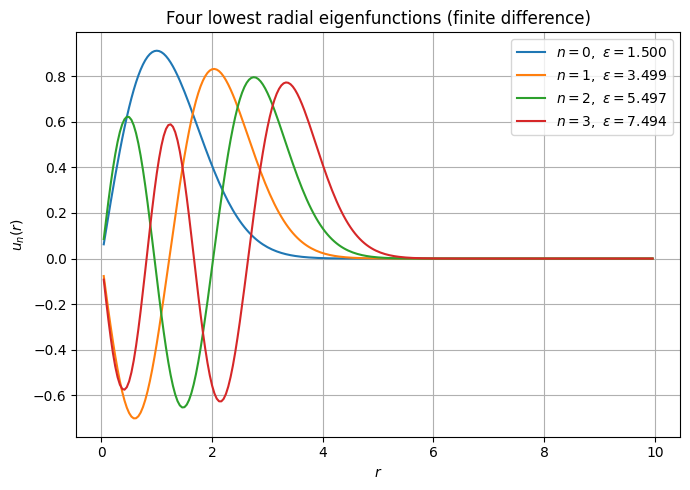

In [47]:
plt.figure(figsize=(7, 5))

for n in range(4):
    plt.plot(r, u[:, n], label=rf"$n = {n},\ \varepsilon = {energies[n]:.3f}$")

plt.xlabel(r"$r$")
plt.ylabel(r"$u_n(r)$")
plt.title("Four lowest radial eigenfunctions (finite difference)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


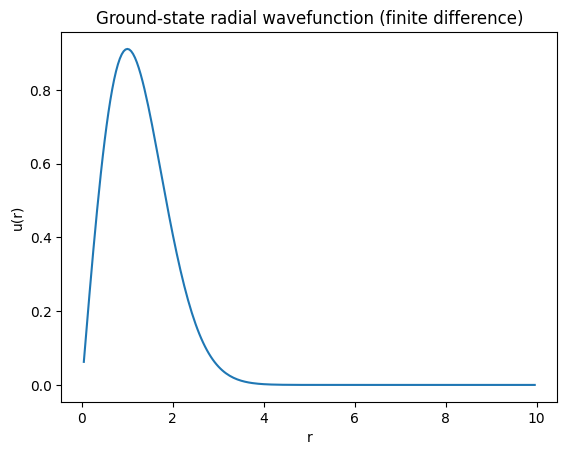

In [48]:
u0 = u[:, 0]

plt.plot(r, u0)
plt.xlabel("r")
plt.ylabel("u(r)")
plt.title("Ground-state radial wavefunction (finite difference)")
plt.show()
